In [3]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("data_science_salaries.csv")

# Show the first 5 rows
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [10]:
missing_values = df.isnull().sum()
missing_values

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [28]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB
None


In [32]:
print("\nAll Columns Name:")
print(df.columns)


All Columns Name:
Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')


In [7]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [26]:
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df['salary_in_usd'].describe()

count      6599.000000
mean     145560.558569
std       70946.838070
min       15000.000000
25%       95000.000000
50%      138666.000000
75%      185000.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

In [30]:
df['salary_currency'].unique()

array(['USD', 'GBP', 'EUR', 'TRY', 'THB', 'ZAR', 'SGD', 'INR', 'PLN',
       'PHP', 'NOK', 'ILS', 'HKD', 'AUD', 'CHF', 'CAD', 'BRL', 'JPY',
       'HUF', 'DKK', 'CLP', 'MXN'], dtype=object)

In [34]:
df['salary_currency'].value_counts()

salary_currency
USD    5827
GBP     334
EUR     292
INR      51
CAD      39
AUD      11
PLN       7
SGD       6
CHF       5
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
CLP       1
ILS       1
HKD       1
PHP       1
ZAR       1
MXN       1
Name: count, dtype: int64

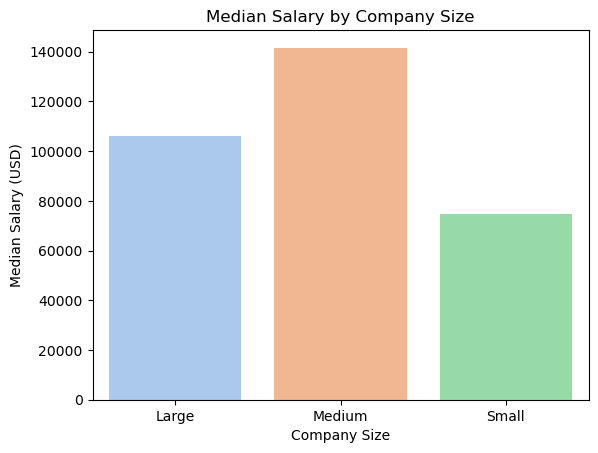

In [48]:
# median salary by company size
median_salary = df.groupby('company_size')['salary_in_usd'].median().reset_index()


sns.barplot(
    data=median_salary,
    x='company_size',
    y='salary_in_usd',
    hue='company_size',           
    palette='pastel',
    legend=False                 
)
plt.title("Median Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Median Salary (USD)")
plt.show()


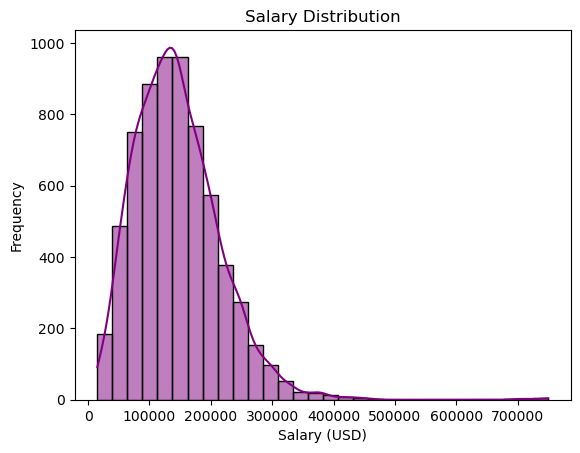

In [138]:
#Salary Distribution
# Histogram (bars)

sns.histplot(df['salary_in_usd'], bins=30, kde=True, color="purple" )

plt.title("Salary Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

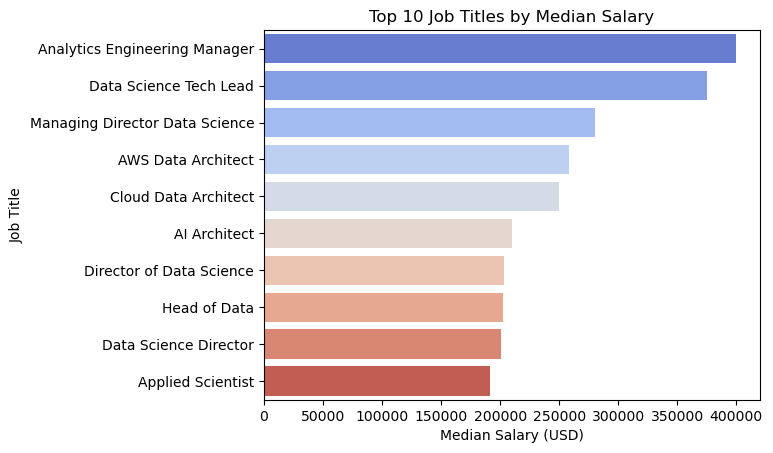

In [120]:
#Median Salary by Job Title
#bar plot
median_by_job = df.groupby("job_title")["salary_in_usd"].median().sort_values(ascending=False).head(10)

df_jobs = median_by_job.reset_index()
df_jobs.columns = ['job_title', 'median_salary']

sns.barplot(data=df_jobs, y='job_title', x='median_salary', hue='job_title', palette='coolwarm', legend=False)
plt.title("Top 10 Job Titles by Median Salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Job Title")
plt.show

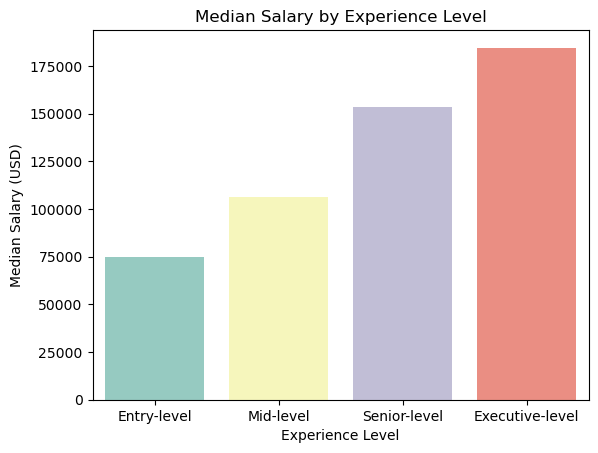

In [8]:
#Salary by Experience Level
#bar plot
median_by_exp = df.groupby("experience_level")["salary_in_usd"].median().sort_values()

df_exp = median_by_exp.reset_index()
df_exp.columns = ['experience_level', 'median_salary']

sns.barplot(data=df_exp, x='experience_level', y='median_salary', hue='experience_level', palette='Set3', legend=False)
plt.title("Median Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Median Salary (USD)")
plt.show()

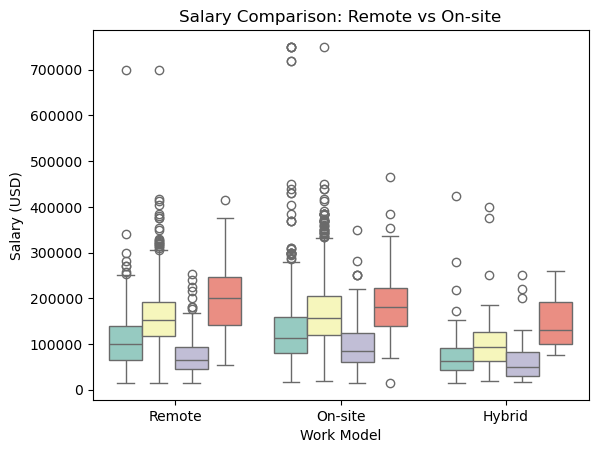

In [126]:
#Remote vs On-site Salary Comparison
#box plot

sns.boxplot(x="work_models", y="salary_in_usd", data=df, hue='experience_level', palette='Set3', legend=False)
plt.title("Salary Comparison: Remote vs On-site")
plt.xlabel("Work Model")
plt.ylabel("Salary (USD)")
plt.show()

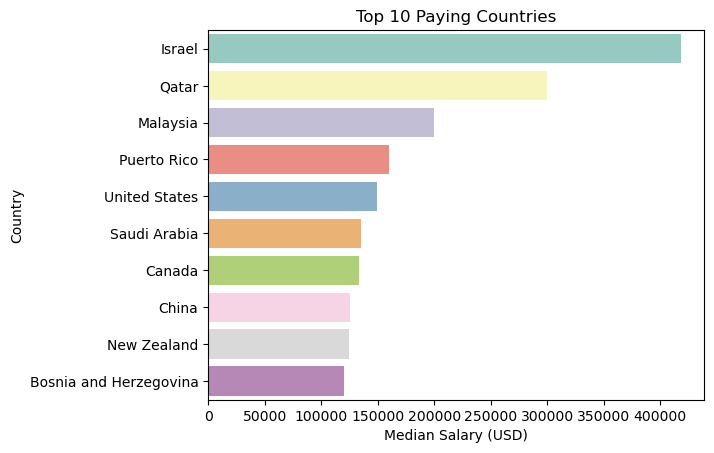

In [134]:
top_countries = df.groupby("employee_residence")["salary_in_usd"].median().sort_values(ascending=False).head(10)

# Convert to DataFrame
top_df = top_countries.reset_index()
top_df.columns = ['employee_residence', 'median_salary']

# bar plot
sns.barplot(data=top_df, x='median_salary', y='employee_residence', hue='employee_residence', palette='Set3', legend=False)
plt.title("Top 10 Paying Countries")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Country")
plt.show()

In [146]:
print(df.dtypes)

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object


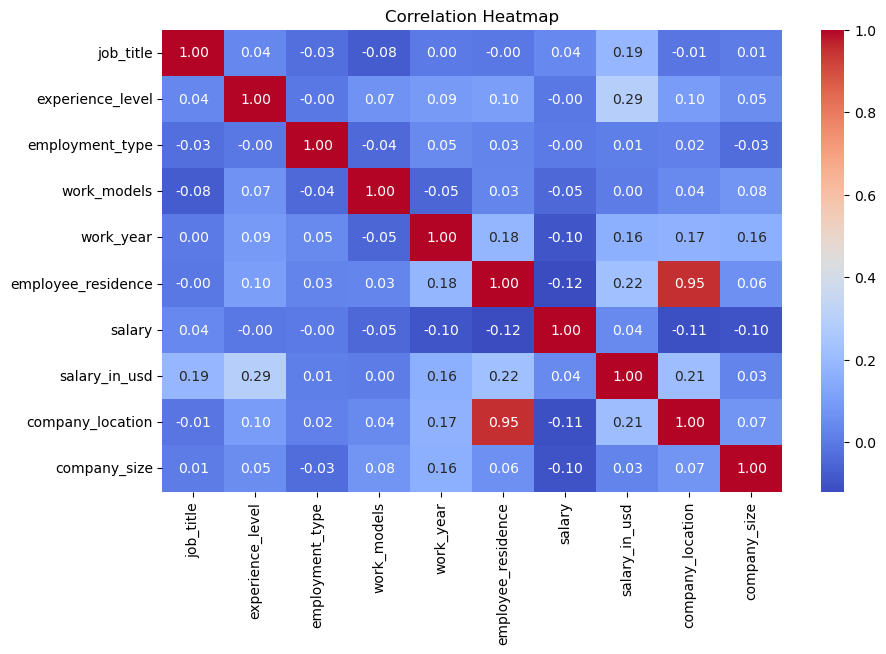

In [150]:
# Convert categorical columns to numerical using label encoding
df_encoded = df.copy()
categorical_cols = ['job_title', 'experience_level', 'employment_type', 'work_models',
                    'employee_residence', 'company_location', 'company_size']

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


correlation_matrix = df_encoded.corr(numeric_only=True)

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

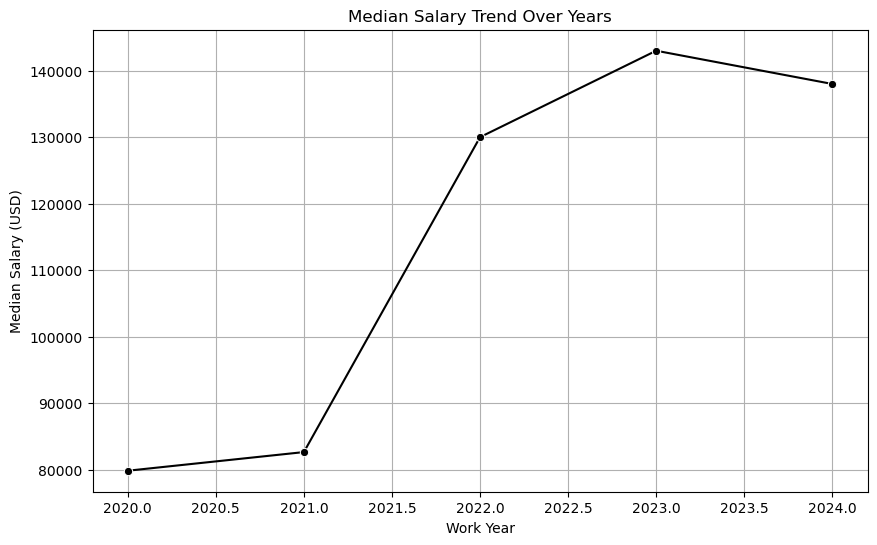

In [164]:
#salary trends over years
#line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary_trend, marker='o', color='black')
plt.title("Median Salary Trend Over Years")
plt.xlabel("Work Year")
plt.ylabel("Median Salary (USD)")
plt.grid(True)
plt.show()